# Google Play App Store - Data Analyis 

### The relationship between ratings and size

How did you measure the relationship? Why did you choose this measurement?
Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof.


description to be added later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
store_data = pd.read_csv('data/googleplaystore.csv')
store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
store_data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
714k                     1
552k                     1
782k                     1
756k                     1
Name: Size, Length: 462, dtype: int64

In [5]:
# See the distribution of unique values 
store_data['Size'].value_counts() 

#Remove all rows without a concrete app size 

store_data.drop(store_data.index[store_data['Size'] == 'Varies with device'], inplace = True)

In [7]:
#Remove special characters from values

store_data['Size'] = store_data['Size'].str.replace("+", "")
store_data['Size'] = store_data['Size'].str.replace(",", "")
store_data['Size'].value_counts()

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
861k      1
624k      1
728k      1
458k      1
50k       1
Name: Size, Length: 461, dtype: int64

In [8]:
#Since there are int and float numbers in Million units, here's a funciton that replaces M with five zeros

def replace_floats(x:str):
    if x.find('.')!=-1:
        return x.replace('M','00000')
    else:
        return x

#Applying the function to the Series to handle all string values containing float numbers    
store_data['Size'] = store_data['Size'].apply(replace_floats)

In [15]:
#Replacing "M" for the int numbers in Million units with six zeros 
store_data['Size'] = store_data['Size'].str.replace("M", "000000")

#Replacing the "k" for the int numbers in K units with three zeros 
store_data['Size'] = store_data['Size'].str.replace("k", "000")

#Removing the dots from the float numbers 
store_data['Size'] = store_data['Size'].str.replace(".", "")


11000000    198
12000000    196
14000000    194
13000000    191
15000000    184
           ... 
902000        1
514000        1
608000        1
257000        1
404000        1
Name: Size, Length: 460, dtype: int64

In [16]:
#Converting the Series type from obj to int
store_data['Size'] = store_data['Size'].astype(int)

#Creating a function to convert file size from bytes to megabytes
def convert_byte_to_mb(s):
     return int(s/1000000)

In [22]:
#Adding a new column 'Size MB' to the DataFrame that contains all app sizes in MB
store_data['Size MB'] = store_data['Size'].apply(convert_byte_to_mb)

In [24]:
store_data['Rating'].value_counts()
#there's an outlier that has 19.0 as the review; possibly a mistake during the scraping process

4.4     835
4.5     822
4.3     818
4.2     740
4.6     646
4.1     594
4.0     481
4.7     421
3.9     333
3.8     272
5.0     269
4.8     216
3.7     198
3.6     158
3.5     153
3.4     115
3.3      98
4.9      86
3.0      74
3.1      62
3.2      60
2.9      43
2.8      42
2.6      24
2.7      23
2.3      20
2.5      19
2.4      19
1.0      16
2.2      14
1.9      12
2.0      11
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
19.0      1
Name: Rating, dtype: int64

In [25]:
#Replace the 19.0 rating with 1.9
store_data['Rating'] = store_data['Rating'].replace(19.0, 1.9)

In [26]:
#Checking for rows without rating values
store_data['Rating'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
10835     True
10836    False
10837    False
10838     True
10840    False
Name: Rating, Length: 9146, dtype: bool

In [27]:
#Creating a copy of the DataFrame that does not contain the rows missing rating values
rated_store_data = store_data[store_data['Rating'].notna()]

In [29]:
rated_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7730 entries, 0 to 10840
Data columns (total 14 columns):
App               7730 non-null object
Category          7730 non-null object
Rating            7730 non-null float64
Reviews           7730 non-null object
Size              7730 non-null int64
Installs          7730 non-null object
Type              7730 non-null object
Price             7730 non-null object
Content Rating    7729 non-null object
Genres            7730 non-null object
Last Updated      7730 non-null object
Current Ver       7726 non-null object
Android Ver       7727 non-null object
Size MB           7730 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 905.9+ KB


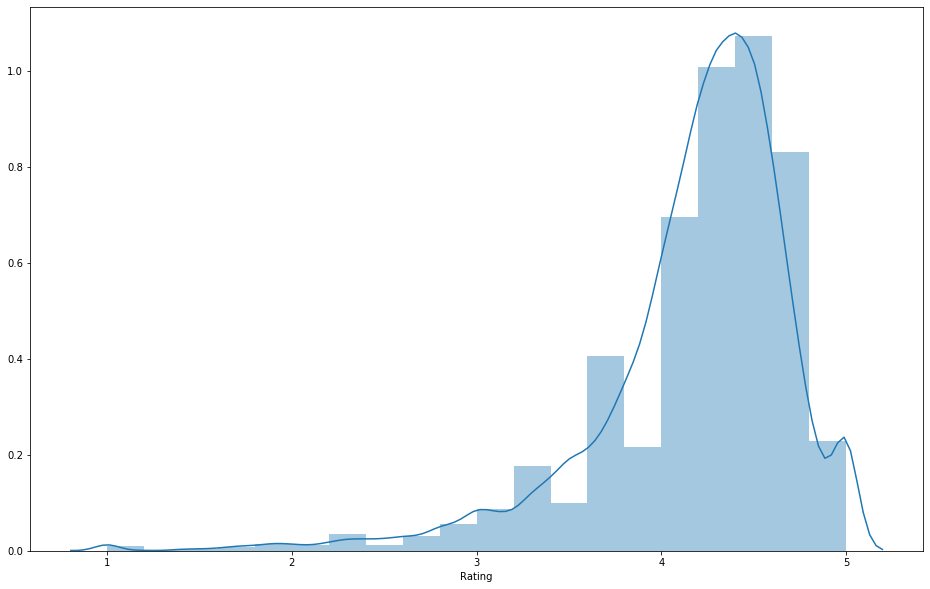

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(16, 10))
sns.distplot(rated_store_data['Rating'], bins = 20)

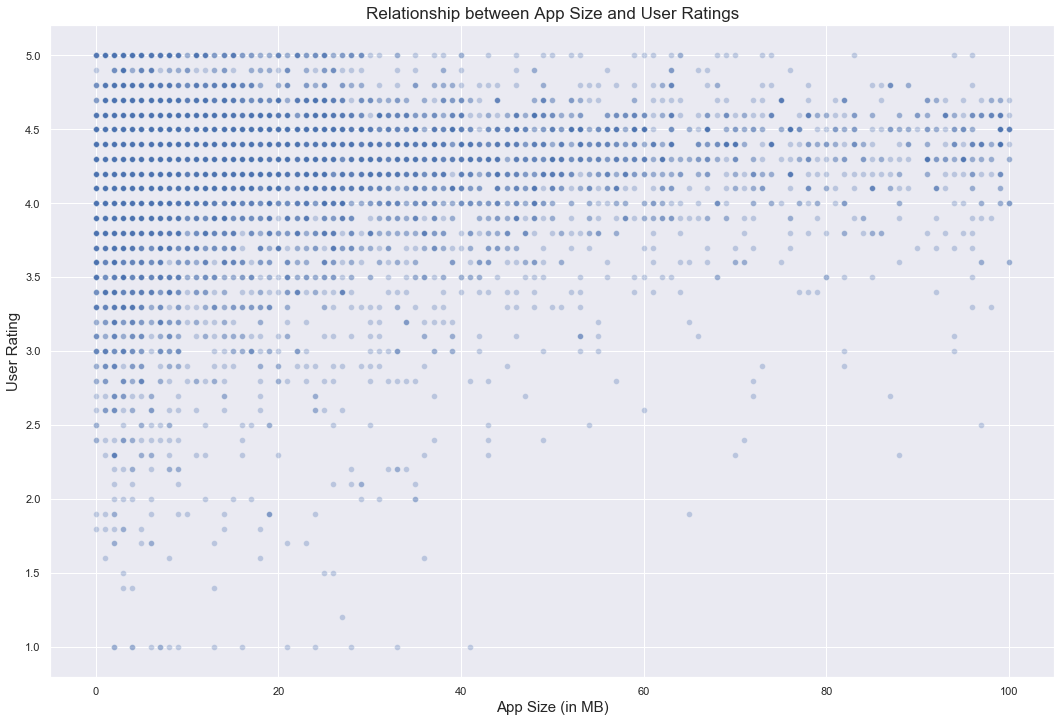

In [46]:
ax = sns.scatterplot(x="Size MB", y="Rating", data=rated_store_data, alpha=0.3)
sns.set(rc={'figure.figsize':(18,12)})
plt.xlabel('App Size (in MB)', fontsize=15)
plt.ylabel('User Rating', fontsize=15)
plt.title('Relationship between App Size and User Ratings', fontsize=17)
plt.savefig("images/size-rating-plot.png")  

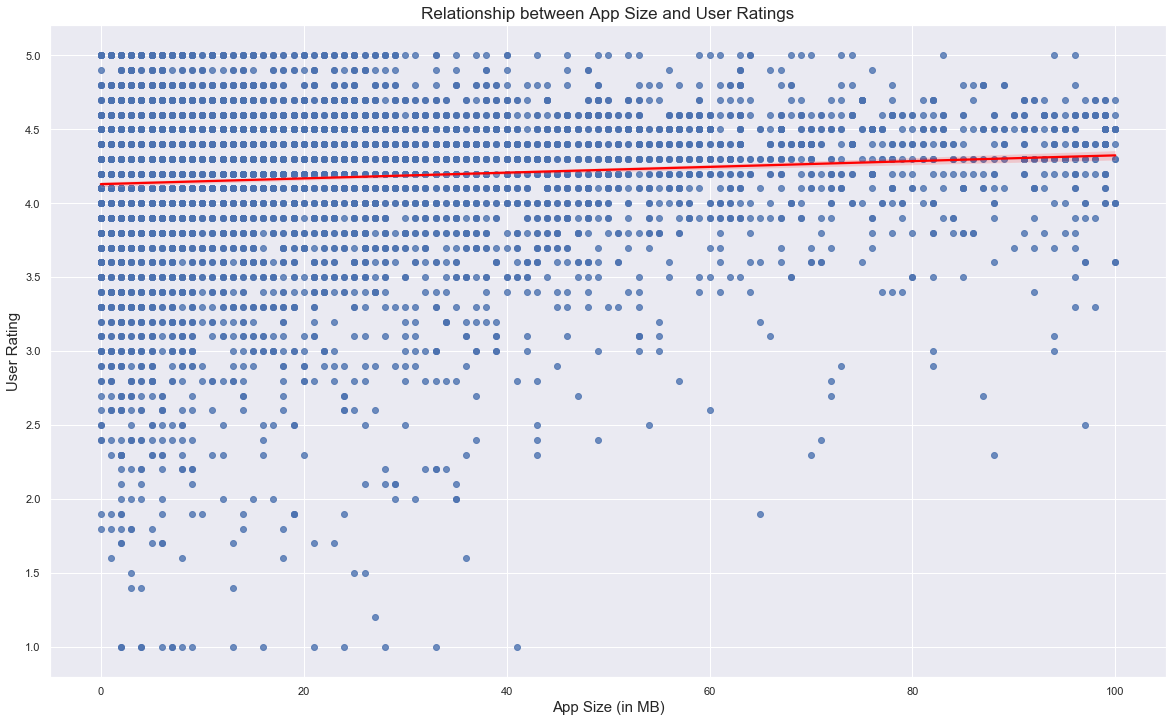

In [64]:
figure = sns.regplot(x="Size MB", y="Rating", data=rated_store_data, line_kws={"color": "red"})
sns.set(rc={'figure.figsize':(20,12)})
plt.xlabel('App Size (in MB)', fontsize=15)
plt.ylabel('User Rating', fontsize=15)
plt.title('Relationship between App Size and User Ratings', fontsize=17)
plt.savefig("images/size-rating-plot-w-line.png") 